In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# <u> Créer un NOTEBOOK qui montrera le panorama de l’état de la malnutrition dans le monde.</u>
Le Notebook est constitué de 3 parties. Chaque partie correspond à des requêtes visant une personne (Marc, Mélanie, Julien).
# <u> PARTIE 1: Requêtes de Marc </u>

## Dans cette partie, nous allons faire ressortir les données suivantes :
1. La proportion de personnes en état de sous-nutrition 
2. Le nombre théorique de personnes qui pourraient être nourries.*(calculé à partir de la disponibilité alimentaire mondiale)
3. La disponibilité alimentaire des produits végétaux 
4. L’utilisation de la disponibilité intérieure
    - Part attribuée à l’alimentation animale
    - Part qui est perdue
    - Part qui est concrètement utilisée pour l'alimentation humaine
    
**Cette étude va être realisée avec les données correspondants à l'année 2017**

## <u> 1. Proportion des personnes en état de sous-noutrition.</u>
### Nous commencons par préparer le document sur lequel nous allons travailler

- Première étape: Importation des fichiers 'population.csv' et 'sous_nutrition.csv' 
- Deuxième étape: Renommer les colonnes "Zone" et "Valeur" et les remplacer par "Pays" et "Population" dans les deux DataFrames
- Troisième étape: Replacer les années intervales de la colonne "Année" par une seule année
- Quatrième étape: Replacer les valeurs '<0,1' par '0'
- Cinquième étape: Replacer les types de données "Année" (object -> int64) et "Population_snutrition" (object -> float)

In [2]:
#importation des dataframes
population = pd.read_csv ('/Users/carloscorreawalasek/Desktop/OPENCLASSROOMS/DATA ANALYST/PROJETS/P4/Annexes Projet/Annexes Mission/DAN-P4-FAO/population.csv')
snutrition = pd.read_csv ('/Users/carloscorreawalasek/Desktop/OPENCLASSROOMS/DATA ANALYST/PROJETS/P4/Annexes Projet/Annexes Mission/DAN-P4-FAO/sous_nutrition.csv',)

#renommer les colonnes
population.rename(columns={'Zone':'Pays','Valeur':'Population_total'}, inplace='TRUE')
snutrition.rename(columns={'Zone':'Pays','Valeur':'Population_snutrition'}, inplace='TRUE')

#replacer les intervalles d'années par une seule année de la colonne "Année" dans le dataframe "snutrition"
snutrition = snutrition.replace({'Année' : {'2012-2014' : '2013','2013-2015' : '2014', '2014-2016': '2015', '2015-2017': '2016','2016-2018' : '2017', '2017-2019': '2018'}})

#replacer les cellules '<0,1' par 0 de la colonne "Population_snutrition" dans le dataframe "snutrition"
snutrition['Population_snutrition'] = snutrition['Population_snutrition'].replace(['<0.1'], '0')

#replacer le type de donnée de la colonne "Année" de 'object' à 'int64'
snutrition['Année']=snutrition['Année'].astype("int64")

#replacer le type de donnée de la colonne "Population_snutrition" de 'object' à 'float64'
snutrition['Population_snutrition'] = snutrition['Population_snutrition'].astype(str).astype(float)

snutrition.dtypes

Pays                      object
Année                      int64
Population_snutrition    float64
dtype: object

### A présent, nous allons faire la jointure entre la DataFrame 'population' et la DataFrame 'snutrition' en désignant la colonne 'Pays' comme correspondance ou Clé Primaire

Il va falloir à présent ajouter les informations de snutrition au dataframe population. Nous pourrons faire cela via la fonction [`merge`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) de pandas.

Ici, on souhaite absolument conserver l'ensemble des informations qui sont dans nos deux dataframe (population et snutrition) donc nous allons opter pour la méthode 'inner'.
*(A noter que notre jointure se fera au travers de la colonne 'Pays')*

In [3]:
df_final = pd.merge(population, snutrition, on='Pays', how='inner')
df_final.head()

,Pays,Année_x,Population_total,Année_y,Population_snutrition
0,Afghanistan,2013,32269.589,2013,8.6
1,Afghanistan,2013,32269.589,2014,8.8
2,Afghanistan,2013,32269.589,2015,8.9
3,Afghanistan,2013,32269.589,2016,9.7
4,Afghanistan,2013,32269.589,2017,10.5


## Ensuite, nous allons convertir les valeurs au même ordre de grandeur des colonnes Population_total pour qu'elle corresponde à la même Population_snutrition 

In [4]:
# Convertir l'unité de mésure de la colonne population_total exprimée en milliers d'habitants 
df_final['Population_total'] = df_final['Population_total'] * 1000

df_final.head()

,Pays,Année_x,Population_total,Année_y,Population_snutrition
0,Afghanistan,2013,32269589.0,2013,8.6
1,Afghanistan,2013,32269589.0,2014,8.8
2,Afghanistan,2013,32269589.0,2015,8.9
3,Afghanistan,2013,32269589.0,2016,9.7
4,Afghanistan,2013,32269589.0,2017,10.5


### Puis, nous allons filter les colonnes 'Année' (Année_x et Année_y) pour ne travailler qu'avec les données de 2017

In [5]:
#filtrer les colonnes Année pour faire apparaitre les données de 2017
df_final2017 = df_final.loc[(df_final['Année_x'] == 2017) & (df_final['Année_y'] == 2017)]
df_final2017.head()

,Pays,Année_x,Population_total,Année_y,Population_snutrition
28,Afghanistan,2017,36296113.0,2017,10.5
64,Afrique du Sud,2017,57009756.0,2017,3.1
100,Albanie,2017,2884169.0,2017,0.1
136,Algérie,2017,41389189.0,2017,1.3
172,Allemagne,2017,82658409.0,2017,NaN


### On additionne toutes les cellules de la colonne population_total de 2017 et puis nous allons additionner toutes les valeurs de la colonne population_snutrition de 2017

In [6]:
#additionner toutes les valeurs de la population
pop_total = df_final2017['Population_total'].sum()
print(pop_total)

7543798779.0


In [7]:
#additionner toutes les valeurs de la population en sous-nutrition
snutrition_total = df_final2017['Population_snutrition'].sum()
print(snutrition_total)

535.7


### On calcule la proportion

In [8]:
part_sous_nutrition =(snutrition_total/(pop_total))*100
print(part_sous_nutrition)

7.101196833235417e-06


# <u> La proportion de la population en sous-nutrition  était de 7,1% en 2017 </u>

## <u> 2. Le nombre théorique de personnes qui pourraient être nourries. (calculé à partir de la disponibilité alimentaire mondiale).</u>
### Nous commencons par préparer les documents sur lequels nous allons travailler
- Première étape: Importation du fichier 'dispo_alimentaire.csv'
- Deuxième étape: Renommer la colonne "Zone" et la remplacer par "Pays"
- Troisème étape: Replacer les valeurs NaN par des '0'
- Quatrième étape: Convertir les valeurs 'population_total' en millions
- Cinquième étape: Replacer les types de données "Population_total" (object -> float)
- Sixième étape: Filtrer seulement les données relatives à l'année 2017
- Septième étape: Faire la jointure entre la table 'population' ( filtrée en 2017) et la table 'dispo_alimentaire' sur la valeur 'Pays'

In [9]:
#importer les dataframe 'dispo_alimentaire'
dispo_alimentaire = pd.read_csv ('/Users/carloscorreawalasek/Desktop/OPENCLASSROOMS/DATA ANALYST/PROJETS/P4/Annexes Projet/Annexes Mission/DAN-P4-FAO/dispo_alimentaire.csv')

#renommer la colonne 'Zone' par 'Pays'
dispo_alimentaire.rename(columns={'Zone':'Pays'}, inplace='TRUE')

#replacer les cellules 'NaN' par 0 dans la dataframe 'dispo_alimentaire'
dispo_alimentaire= dispo_alimentaire.fillna(0)

#convertir les valeurs de 'population_total' en millions
population['Population_total'] = population['Population_total'] * 1000

#replacer le type de donnée de la colonne "Population_total" de 'object' à 'float64'
population['Population_total'] = population['Population_total'].astype(str).astype(float)

#création d'une dataframe à partir de 'population' seulement avec les données de '2017' de la colonne 'Année'
population2017 = population.loc[(population['Année'] == 2017)]

#jointure entre les tables 'population2017' et 'dispo_alimentaire' sur la clé 'Pays' en sélectionner les valeurs 'Pays', 'Disponibilité alimentaire (Kcal/personne/jour)'
all_products=pd.merge(dispo_alimentaire, population2017, on ='Pays', how='left')

all_products.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population_total
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,2017.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0


### On va calculer la disponibilité alimentaire par personne/jour sur la valeur population


In [10]:
#calculer la dispo alimentaire à partir de la population totale et pour une année (365 jours)
all_products['dispo_par_pays'] = all_products['Disponibilité alimentaire (Kcal/personne/jour)']*all_products['Population_total']*365
all_products.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population_total,dispo_par_pays
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,...,0.0,53.0,0.0,53.0,0.0,0.0,0.0,2017.0,36296113.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,...,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,...,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,5.299232e+10


### On va additionner toute la disponibilité mondiale

In [11]:
#additioner la disponibilité mondiale
dispo_mondiale=all_products['dispo_par_pays'].sum()
print(dispo_mondiale)

7635429388975815.0


#### D'après l'Organisation Mondiale de la Santé (OMS), un homme doit consommer environ 2 500 kilocalories (kcal) par jour.
#### Les valeurs nous ont été données en jour, nous allons ramener le résultat à l'année (en multipliant les données par 365 jours).
## Nous allons donc calculer le nombre de personnes qui pourraient être nourries à partir de la disponibilité mondiale et la valeur énérgetique journalière moyenne nécessaire pour s'alimenter

In [12]:
#calculer la disponibilité mondiale par rapport à la consommation nécessaire par humain
total=round(dispo_mondiale/(2500*365))
print(total, "de personnes pourraient être nourries en 2017")

8367593851 de personnes pourraient être nourries en 2017


### La population mondiale en 2017 était de 7 519 000 000 (selon l'ONU).
### Le nombre théorique de personnes qui auraient pu être nourri en 2017 d'après la disponibilité alimentaire était de 8 367 593 850.


In [13]:
#exposer le résultat en %
pop_mondiale_2017 = 7519000000

total_theo =(total/pop_mondiale_2017)*100
print(total_theo, "% de la population aurait pu être nourrie en 2017")

111.28599349647558 % de la population aurait pu être nourrie en 2017


## <u> 110% de la population mondiale pourrait être nourrie. On conclut donc que TOUTE la population mondiale aurait pu être nourrie.</u>

## <u> 3. La disponibilité alimentaire des produits végétaux </u>
### Nous commencons par préparer le document sur lequel nous allons travailler
- Première étape: Filter uniquement les valeurs 'vegetale' de la colonne 'Origine'

In [14]:
#création d'une dataframe à partir de 'dispo_alimentaire' seulement avec les données de 'vegetale' de la colonne 'Origine'
dispoveg = all_products.loc[(all_products['Origine'] == 'vegetale')]
dispoveg.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population_total,dispo_par_pays
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,...,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,...,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,5.299232e+10
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.000000e+00


### On va calculer la disponibilité alimentaire de végétaux par personne/jour sur la valeur population

In [15]:
#calculer la disponibilité alimentaire en végétaux
dispo_mondiale_veg=dispoveg['dispo_par_pays'].sum()
print(dispo_mondiale_veg)

6300178937197865.0


#### D'après l'Organisation Mondiale de la Santé (OMS), un homme doit consommer environ 2 500 kilocalories (kcal) par jour.
#### Les valeurs nous ont été données en jour, nous allons ramener le résultat à l'année (en multipliant les données par 365 jours).

## Nous allons donc calculer le nombre de personnes qui pourraient être nourries à partir de la disponibilité mondiale et la valeur énérgetique journalière moyenne nécessaire pour s'alimenter

In [16]:
#calculer le nombre de personnes qui pourraient être nourri avec les végetaux
veggies=round(dispo_mondiale_veg/(2500*365),2)
print(veggies,"de personnes pourraient être nourries avec des végétaux en 2017")

6904305684.6 de personnes pourraient être nourries avec des végétaux en 2017


## La population mondiale en 2017 était de *7 519 000 000* (selon l'ONU).
## Le nombre théorique de personnes qui auraient pu être nourries à partir d'aliments d'origine végétale en 2017 était de *6 904 305 684*. 

In [17]:
#exposer le résultat en %
pop_mondiale_2017 = 7519000000

veggies_theo =((veggies/pop_mondiale_2017)*100)
print(veggies_theo,"% de la population aurait pu être nourri avec des végétaux en 2017")

91.82478633594894 % de la population aurait pu être nourri avec des végétaux en 2017


## <u>91,8% de la population pourrait être nourrie avec des aliments d'origine végétale.</u>

## <u> 4. L'utilisation de la disponibilité intérieur: </u>
    - la part qui est attribuée à l’alimentation animale
    - la part qui est perdue
    - la part qui est concrètement utilisée pour l'alimentation humaine

- Première étape: additionner toute la disponibilité intérieure

In [18]:
#additioner la disponibilité intérieure
dispo_int=dispo_alimentaire['Disponibilité intérieure'].sum()
print(dispo_int)

9848994.0


### On additionne toutes les valeurs de la colonne 'Aliments pour animaux'

In [19]:
#additione les aliments pour animaux
alim_anim=dispo_alimentaire['Aliments pour animaux'].sum()
print(alim_anim)

1304245.0


### On va diviser le resultat des 'Aliments pour animaux' totale par la 'Disponibilité intérieure' totale

In [20]:
#calculer la part pour les animaux sur la disponibilité intérieure
part_animaux=alim_anim/dispo_int*100
print(part_animaux, "% de la disponibilité intérieure est utilisée pour alimenter les animaux")

13.242418464261426 % de la disponibilité intérieure est utilisée pour alimenter les animaux


# <u> La proportion de la part pour alimenter les animaux sur la disponible intérieure totale est de  de 13,2% </u>

### On additionne toutes les valeurs de la colonne 'Pertes'

In [21]:
#additioner le total des pertes
pertes=dispo_alimentaire['Pertes'].sum()
print(pertes)

453698.0


### On va diviser le resultat des 'Pertes' totales par la 'Disponibilité intérieure' totale

In [22]:
#calcul de la part de pertes
part_pertes=pertes/dispo_int*100
print(part_pertes, "% de la disponibilité intérieure est perdue")

4.606541541196999 % de la disponibilité intérieure est perdue


# <u> La proportion des pertes sur la disponible intérieure totale est de  de 4,6% </u>

### On additionne toutes les valeurs de la colonne 'Nourriture"

In [23]:
#additioner le total de la disponibilité alimentaire pour humains
humains=dispo_alimentaire['Nourriture'].sum()
print(humains)

4876258.0


In [24]:
#calcul de la part des aliments pour humains
part_humains=humains/dispo_int*100
print(part_humains,"% de la disponibilité intérieure est utilisée pour les humains")

49.51021393657058 % de la disponibilité intérieure est utilisée pour les humains


# <u> La proportion de la nourriture pour humains sur la disponible intérieure totale est de 49,5% </u>

#### Afin de s'assurer de la cohérence des résultats ci-dessus, nous avons calculé la proportion de chaque utilisation de la disponibilité intérieure totale et nous les avons additioné.

## Autres parts

Semences

In [25]:
#calcul de la part des aliments pour la semence
semences=dispo_alimentaire['Semences'].sum()
part_semences=semences/dispo_int*100
print(part_semences,"% de la disponibilité intérieure est utilisée pour les semences")

1.5705258831511117 % de la disponibilité intérieure est utilisée pour les semences


<u>Part "Semences" = 1,57% </u>

Traitement

In [26]:
#calcul de la part des aliments pour le traitement
traitement=dispo_alimentaire['Traitement'].sum()
part_traitement=traitement/dispo_int*100
print(part_traitement,"% de la disponibilité intérieure est utilisée pour les semences")

22.384895350733284 % de la disponibilité intérieure est utilisée pour les semences


<u> Part "Traitement" = 22,38% </u>

Autres Utilisations

In [27]:
#calcul de la part des aliments pour les autres utilisations
var=dispo_alimentaire['Autres Utilisations'].sum()
part_var=var/dispo_int*100
print(part_var, "% de la disponibilité intérieure est utilisée pour d'autres utilisations")

8.782856401374598 % de la disponibilité intérieure est utilisée pour d'autres utilisations


<u>Part "Autres Utilisations" = 8,78% </u>

### SOMME DE TOUTES LES PARTS DE LA DISPONIBILITÉ INTÉRIEURE

In [28]:
#somme de toutes les parts de la disponibilité alimentaire
total=part_animaux+part_pertes+part_humains+part_semences+part_traitement+part_var
print(total,"% de la disponibilité intérieure est utilisée")

100.097451577288 % de la disponibilité intérieure est utilisée


### Nous allons faire une representation graphique de la disponiblité intérieure.

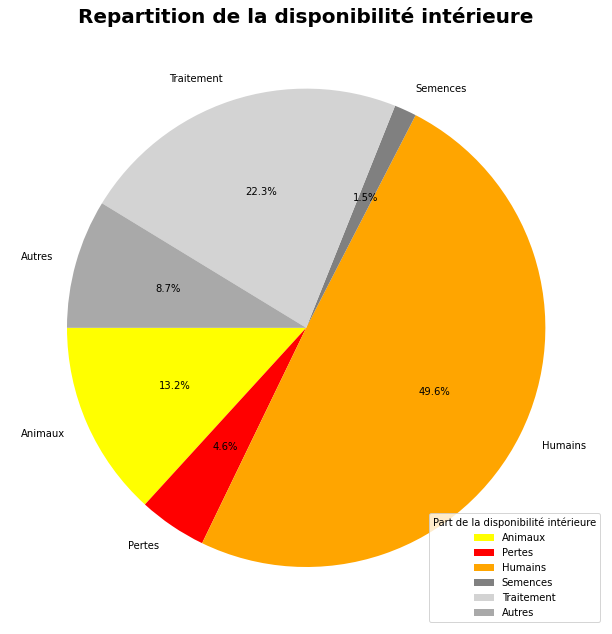

In [29]:
part_dispo=('Animaux','Pertes','Humains','Semences','Traitement','Autres')

pie_total=[13.2,4.6,49.5,1.5,22.3,8.7]

plt.figure(figsize=(11,11))

plt.pie(pie_total,labels=part_dispo, startangle=180,
        colors=['yellow','red','orange','grey','lightgrey','darkgrey'],
        autopct="%.1f%%")

plt.title("Repartition de la disponibilité intérieure", fontweight="bold", size='20')

plt.legend(title="Part de la disponibilité intérieure", loc='lower right', )

plt.show(block = False)


## <u>Le resultat nous donne bien 100% (à 0,1% près) </u>

# <u> PARTIE 2: Requêtes Mélanie </u>

## Afin de répondre à cette demande, nous allons faire ressortir les données suivantes :
1. Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017
2. Les pays qui ont le plus bénéficié d'aides depuis 2013
3. Les pays ayant le plus et le moins de disponibilités/habitants 


## <u> 1. Proportion des personnes en état de sous-noutrition par pays </u>

### Nous commencons par préparer le document sur lequel nous allons travailler

- Première étape: Importation du fichier 'population.csv' et 'sous_nutrition.csv' 
- Deuxième étape: Renommer les colonnes "Zone" et "Valeur" et les remplacer par "Pays" et "Population" dans les deux DataFrames
- Troisème étape: Replacer les années intervales de la colonne "Année" par une seule année
- Quatrième étape: Replacer les valeurs '<0,1' et 'NaN' par '0'
- Cinquième étape: Replacer les types de données "Année" (object -> int64) et "Population_snutrition" (object -> float)

In [30]:
#importer les dataframes
population = pd.read_csv ('/Users/carloscorreawalasek/Desktop/OPENCLASSROOMS/DATA ANALYST/PROJETS/P4/Annexes Projet/Annexes Mission/DAN-P4-FAO/population.csv')
snutrition = pd.read_csv ('/Users/carloscorreawalasek/Desktop/OPENCLASSROOMS/DATA ANALYST/PROJETS/P4/Annexes Projet/Annexes Mission/DAN-P4-FAO/sous_nutrition.csv')

#renommer les colonnes
population.rename(columns={'Zone':'Pays','Valeur':'Population_total'}, inplace='TRUE')
snutrition.rename(columns={'Zone':'Pays','Valeur':'Population_snutrition'}, inplace='TRUE')

#replacer les intervalles d'année par une seule année
snutrition = snutrition.replace({'Année' : {'2012-2014' : '2013','2013-2015' : '2014', '2014-2016': '2015', '2015-2017': '2016','2016-2018' : '2017', '2017-2019': '2018'}})

#replacer les cellules '<0,1' par 0 dans colonne "Population_snutrition"
snutrition['Population_snutrition'] = snutrition['Population_snutrition'].replace(['<0.1'], '0')

#replacer les cellules 'NaN' par 0 dans colonne "Population_snutrition"
snutrition['Population_snutrition'] = snutrition['Population_snutrition'].fillna(0)

#replacer le type de donnée de la colonne "Année" de 'object' à 'int64'
snutrition['Année']=snutrition['Année'].astype("int64")

#replacer le type de donnée de la colonne Population_snutrition" de 'object' à 'float64'
snutrition['Population_snutrition'] = snutrition['Population_snutrition'].astype(str).astype(float)

#replacer le type de donnée de la colonne Population_total" de 'object' à 'float64'
population['Population_total'] = population['Population_total'].astype(str).astype(float)

snutrition.head()

,Pays,Année,Population_snutrition
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


### A présent, nous allons faire la jointure entre la DataFrame 'population' et la DataFrame 'snutrition' en désignant la colonne 'Pays' comme correspondance ou Clé Primaire

Il va falloir à présent ajouter les informations de snutrition au dataframe population. Nous pourrons faire cela via la fonction [`merge`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) de pandas.

Ici, on souhaite absolument conserver l'ensemble des informations qui sont dans nos deux dataframe (population et snutrition) donc nous allons opter pour la méthode 'inner'.
*(A noter que notre jointure se fera au travers de la colonne 'Pays')*

In [31]:
df_final = pd.merge(population, snutrition, on='Pays', how='inner')
df_final.head()

,Pays,Année_x,Population_total,Année_y,Population_snutrition
0,Afghanistan,2013,32269.589,2013,8.6
1,Afghanistan,2013,32269.589,2014,8.8
2,Afghanistan,2013,32269.589,2015,8.9
3,Afghanistan,2013,32269.589,2016,9.7
4,Afghanistan,2013,32269.589,2017,10.5


## Ensuite, nous allons convertir les valeurs des colonnes Population_total pour qu'elles correspondend à la même Population_snutrition 

In [32]:
# Convertir l'ordre de grandeur de la colonne population_total exprimée en milliers d'habitants 
df_final['Population_total'] = df_final['Population_total'] * 1000
df_final['Population_snutrition'] = df_final['Population_snutrition'] * 1000000
df_final.head()

,Pays,Année_x,Population_total,Année_y,Population_snutrition
0,Afghanistan,2013,32269589.0,2013,8600000.0
1,Afghanistan,2013,32269589.0,2014,8800000.0
2,Afghanistan,2013,32269589.0,2015,8900000.0
3,Afghanistan,2013,32269589.0,2016,9700000.0
4,Afghanistan,2013,32269589.0,2017,10500000.0


### On va créer une colonne qui represente la part de la population en sous-noutrition par pays


In [33]:
#calculer la part de la population en sous-nutrition par pays
df_final['Proportion_snutrition'] = (df_final['Population_snutrition'] / df_final['Population_total'])*100

### Puis, nous allons filter les colonnes 'Année' (Année_x et Année_y) pour ne travailler qu'avec les données de 2017

In [34]:
#filter pour ne faire apparaitre que les données de 2017
df_final2017 = df_final.loc[(df_final['Année_x'] == 2017) & (df_final['Année_y'] == 2017)]
df_final2017.head()

,Pays,Année_x,Population_total,Année_y,Population_snutrition,Proportion_snutrition
28,Afghanistan,2017,36296113.0,2017,10500000.0,28.928718
64,Afrique du Sud,2017,57009756.0,2017,3100000.0,5.437666
100,Albanie,2017,2884169.0,2017,100000.0,3.467203
136,Algérie,2017,41389189.0,2017,1300000.0,3.140917
172,Allemagne,2017,82658409.0,2017,0.0,0.000000


## <u> TOP 10 des pays en sous-nutrition (en %) </u>

In [35]:
df_final2017.sort_values(by='Proportion_snutrition', ascending=False).head(10)

,Pays,Année_x,Population_total,Année_y,Population_snutrition,Proportion_snutrition
2836,Haïti,2017,10982366.0,2017,5300000.0,48.259182
5680,République populaire démocratique de Corée,2017,25429825.0,2017,12000000.0,47.188685
3916,Madagascar,2017,25570512.0,2017,10500000.0,41.062924
3736,Libéria,2017,4702226.0,2017,1800000.0,38.279742
3628,Lesotho,2017,2091534.0,2017,800000.0,38.249438
6616,Tchad,2017,15016753.0,2017,5700000.0,37.957606
5824,Rwanda,2017,11980961.0,2017,4200000.0,35.055619
4384,Mozambique,2017,28649018.0,2017,9400000.0,32.810898
6724,Timor-Leste,2017,1243258.0,2017,400000.0,32.173531
28,Afghanistan,2017,36296113.0,2017,10500000.0,28.928718


## <u> 2. Les pays qui ont le plus bénéficié d'aides depuis 2013. </u>

### Nous commencons par préparer le document sur lequel nous allons travailler

- Première étape: Importation du fichier 'aide_alimentaire.csv' 

In [36]:
#Importer le dataframe
aide = pd.read_csv ('/Users/carloscorreawalasek/Desktop/OPENCLASSROOMS/DATA ANALYST/PROJETS/P4/Annexes Projet/Annexes Mission/DAN-P4-FAO/aide_alimentaire.csv')


### Puis additionner les données de la colonne 'Valeur' par pays bénéficiaire

In [37]:
#Faire la somme des valeurs par pays
aide = aide.groupby(by='Pays bénéficiaire')['Valeur'].sum().reset_index()


# <u> TOP 10 des pays bénéficiaires </u>


In [38]:
#Présenter les résultats en ordre décroissant du plus grand au plus petit (TOP 10)
aide.sort_values(by='Valeur', ascending=False).head(10)

,Pays bénéficiaire,Valeur
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


## <u> 3. Les pays qui ont le plus et le moins de disponibilités/habitant. </u>

### Nous commencons par préparer le document sur lequel nous allons travailler

- Première étape: Importation du fichier 'dispo alimentaire.csv'
- Deuxième étape: Renommer la colonne "Zone" et la remplacer par "Pays"
- Troisème étape: Replacer les valeurs NaN par des '0'

In [39]:
# importer la dataframe
dispo_alimentaire = pd.read_csv ('/Users/carloscorreawalasek/Desktop/OPENCLASSROOMS/DATA ANALYST/PROJETS/P4/Annexes Projet/Annexes Mission/DAN-P4-FAO/dispo_alimentaire.csv')

#renommer la colonne 'Zone' par 'Pays'
dispo_alimentaire.rename(columns={'Zone':'Pays'}, inplace='TRUE')

#replacer les cellules 'NaN' par 0 dans la dataframe 'dispo_alimentaire'
dispo_alimentaire= dispo_alimentaire.fillna(0)

dispo_alimentaire.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


### A présent, nous allons faire la jointure entre la DataFrame 'population' et la DataFrame 'aide alimentaire' en désignant la colonne 'Pays' comme correspondance ou Clé Primaire

Il va falloir à présent ajouter les informations de snutrition au dataframe population. Nous pourrons faire cela via la fonction [`merge`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) de pandas.

Ici, on souhaite absolument conserver l'ensemble des informations qui sont dans nos deux dataframe (population et aide alimentaire) donc nous allons opter pour la méthode 'inner'.
*(A noter que notre jointure se fera au travers de la colonne 'Pays')*

In [40]:
#faire la jointure entre les deux dataframe
df = pd.merge(population, dispo_alimentaire, on='Pays', how='inner')
df.head()

,Pays,Année,Population_total,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2013,32269.589,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,2013,32269.589,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,2013,32269.589,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2013,32269.589,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2013,32269.589,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


### On convertit les valeurs de 'population_total' en millions

In [41]:
#convertir les valeurs de 'population_total' en millions
df['Population_total'] = df['Population_total'] * 1000

df.head()

,Pays,Année,Population_total,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2013,32269589.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,2013,32269589.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,2013,32269589.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2013,32269589.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2013,32269589.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


**Cette étude va être realisée avec les données correspondant à l'année 2017**


In [42]:
#filter pour ne faire ressortir que les données de 2017
df2017 = df.loc[(df['Année'] == 2017)]
df2017.head()

,Pays,Année,Population_total,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
240,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


### Puis additionner les données de la colonne 'Disponibilité alimentaire en quantité (kg/personne/an)' par pays

In [43]:
#Faire la somme de la disponibilité alimentaire en quantité par pays
df_dispoalim2017 = df2017.groupby(by='Pays')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

# <u> TOP 10 des pays avec le plus de disponibilité alimentaire </u>


In [44]:
#Présenter les résultats en ordre décroissant (TOP 10)
df_dispoalim2017.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

,Pays,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
157,Turquie,3708.0
169,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
166,Égypte,3518.0
4,Allemagne,3503.0


# <u> TOP 10 des pays avec le moins de disponibilité alimentaire </u>

In [45]:
#Présenter les résultats en ordre décroissant (TOP 10)
df_dispoalim2017.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)

,Pays,Disponibilité alimentaire (Kcal/personne/jour)
127,République centrafricaine,1879.0
164,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
132,République populaire démocratique de Corée,2093.0
150,Tchad,2109.0
165,Zimbabwe,2113.0
114,Ouganda,2126.0
152,Timor-Leste,2129.0


# <u> Partie 3: Requêtes Julien </u>

- Lien logique entre l'ensemble de 10 variables exprimé sous forme d'équation pour avoir la disponibilité alimentaire.
- Utilisation des céréales.
- Utilisation de manioc en Thailande.

## <u> 1. Équation de la disponibilité alimentaire.


##### Disponibilité Intérieure = Production + Importation - Exportation + Variation du stock = Nourriture + Pertes + Semences + Traitement + Aliments Animaux + Autres Utilisations 

## <u> 2. Utilisation des céréales

In [46]:
#créer une liste avec toutes les céréales ressencés dans la colonne "Produit"
liste_cereales=['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']

#filter le fichier avec les données correspondantes aux céréales
dispo_alimentaire_cereales=dispo_alimentaire[dispo_alimentaire['Produit'].isin(liste_cereales)]
dispo_alimentaire_cereales.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200.0,0.0,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13.0,0.0,0.0,12.0,1.0,13.0,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360.0,0.0,26.0,2.92,0.24,0.79,524.0,0.0,10.0,89.0,52.0,514.0,22.0,0.0,0.0


### Nous allons additioner les valeurs de chaque utilisation des céréales

In [47]:
#additionner les valeurs des céréales correspondantes à la part des humains (Nourriture) et la part des animaux
dispo_cereales_total=dispo_alimentaire_cereales['Disponibilité intérieure'].sum()
dispo_prod=dispo_alimentaire_cereales['Production'].sum()
dispo_import=dispo_alimentaire_cereales['Importations - Quantité'].sum()
dispo_export=dispo_alimentaire_cereales['Exportations - Quantité'].sum()
dispo_animaux=dispo_alimentaire_cereales['Aliments pour animaux'].sum()
dispo_nourriture=dispo_alimentaire_cereales['Nourriture'].sum()
dispo_pertes=dispo_alimentaire_cereales['Pertes'].sum()
var_stock=dispo_alimentaire_cereales['Variation de stock'].sum()
dispo_autres=dispo_alimentaire_cereales['Autres Utilisations'].sum()
dispo_semences=dispo_alimentaire_cereales['Semences'].sum()
dispo_traitement=dispo_alimentaire_cereales['Traitement'].sum()

### Puis nous allons calculer la part de chacune d'entre elles par rapport au total

In [48]:
#calcul de la part des céréales destinées à l'alimentation humaine
part_dispo_nourriture=round((dispo_nourriture/dispo_cereales_total)*100,2)
print(part_dispo_nourriture, "% des céréales sont utilisés pour l'alimentation humaine.")

42.75 % des céréales sont utilisés pour l'alimentation humaine.


### <u> La proportion de céréales attribuées aux humains est de 42,75%

In [49]:
part_dispo_animaux=round((dispo_animaux/dispo_cereales_total)*100,2)
print(part_dispo_animaux, "% des céréales sont utilisés pour l'alimentation animale.")

36.29 % des céréales sont utilisés pour l'alimentation animale.


### <u> La proportion de céréales attribuéee aux animaux est de 36,29%

### Nous allons faire une representation graphique de l'utilisation de céréales.

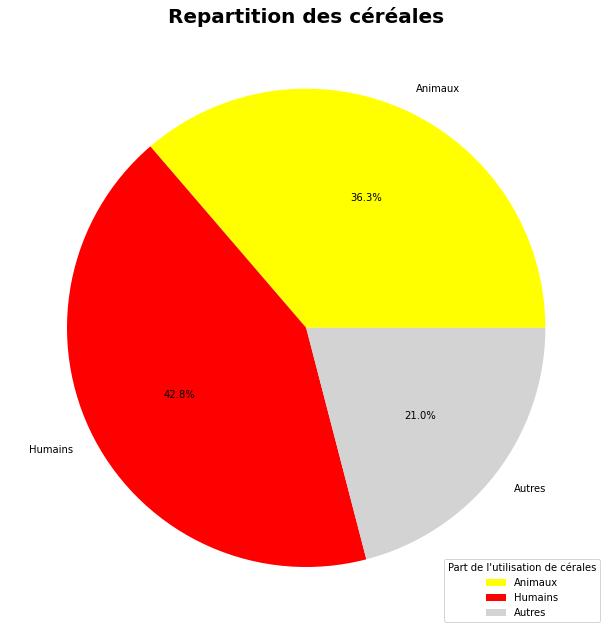

In [50]:
dispo_cereales=('Animaux','Humains','Autres')

pie_total=[36.29,42.75,20.95]

plt.figure(figsize=(11,11))

plt.pie(pie_total,labels=dispo_cereales, startangle=0,
        colors=['yellow','red','lightgrey'],
        autopct="%.1f%%")

plt.title("Repartition des céréales", fontweight="bold", size='20')

plt.legend(title="Part de l'utilisation de cérales", loc='lower right', )

plt.show(block = False)


## <u> 3. Proportion de Manioc exporté sur le total produit en Thaïlande.

In [51]:
#selectioner la ligne correspondante au manioc en Thaïlande dans la dataframe "dsipo_alimentaire"
manioc_thailande=dispo_alimentaire[(dispo_alimentaire['Produit']== 'Manioc') & (dispo_alimentaire['Pays'] == 'Thaïlande')]

#calculer la proportion de manioc exporté sur le total produit en Thaïlande
part_export_manioc_thailande=manioc_thailande['Exportations - Quantité']/manioc_thailande['Production']*100
print('Proportion de manioc exportée :', "{:.2f}".format(manioc_thailande['Exportations - Quantité'].iloc[0]*100 /manioc_thailande['Production'].iloc[0]),"%")

Proportion de manioc exportée : 83.41 %


### <u> 83,41% du manioc produit en Thaïlande est exporté

In [52]:
#selectioner la ligne correspondante à la Thaïlande dans la dataframe "df_final2017"
snutrition_thailande=df_final2017.loc[(df_final2017['Pays'] == 'Thaïlande')]
print("La part de la population en sous-nutrition en Thaïlande est de", snutrition_thailande['Proportion_snutrition'].iloc[0],"%")

La part de la population en sous-nutrition en Thaïlande est de 8.958267621309753 %


### <u> 8,96% de la population de la Thaïlande est en sous nutrition

In [53]:
#calculer la proportion de manioc exporté sur le total produit en Thaïlande
part_nourriture_manioc_thailande=manioc_thailande['Nourriture']/manioc_thailande['Production']*100
print('Proportion de manioc servant à nourrire la population locale :', "{:.2f}".format(manioc_thailande['Nourriture'].iloc[0]*100 /manioc_thailande['Production'].iloc[0]),"%")

Proportion de manioc servant à nourrire la population locale : 2.88 %


### <u> Seulement 2,88% de du manioc produit en Thaïlande sert à nourrire la population locale


### La Thaïlande est l'un des principaux pays producteurs de manioc. En 2017, 83.41% de cette production était destiné à l'exportation.
### Or, on constate également que 8,96 % des Thaïlandais étaient sous-alimentés sur la même année 2017. La Thaïlande exporte donc la plus grande partie de sa production de manioc, qui dans de nombreux pays constitue la base de l'alimentation, notamment en Afrique, alors même qu'une partie de sa population ne mange pas à sa faim.